Here we analyze the financial data related to diffrent Companies and whether a company went Bankrupt or not

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('data.csv')
data.sample()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
916,0,0.555063,0.62729,0.621607,0.616909,0.616909,0.999227,0.797649,0.809592,0.303439,...,0.846578,0.000883,0.62377,0.616904,0.844343,0.280314,0.026825,0.565313,1,0.027417


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.isnull().sum().sum()

np.int64(0)

From the first look at data >

1. target > y > 'Bankrupt?'

2. features > x > all other(94) columns

3. The data tells us about all the financial parameters of a company and whether the company went bankrupt or not

4. This ia a Binary Classification problem (We can start with simple logistic regression model and later move to more complex Random Forest and compare the performances)


In [ ]:
data = data.rename(columns={'Bankrupt?':'target'})

In [ ]:
x = data.drop(columns=['target'], axis=1)
y = data['target']

In [ ]:
print(x.shape)
print(y.shape)

(6819, 95)
(6819,)


Basic data exploration :

1. All columns have correct data types, so no need to change the data types

2. There are 94 feature columns which make the data complex. We can use PCA to perform feature engineering to reduce the no of dimension (no of columns) maintaining the explained varinace at a high value

In [ ]:
#  lets check the correlation among the features

In [ ]:
corrx = x.corr()

In [1]:
sns.heatmap(corrx)
plt.show()

NameError: name 'sns' is not defined

From the heatmap plot its difficult to check the correlation among the columns. There might be columns where variance is very small and euivalent to 0, also columns with very high correlation which we might want to remove to check multicollinearity

In [ ]:
# Scaling the data before applying PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaled = sc.fit_transform(x)

Here we try out PCA to find the cumulative explained variance of the features and finalize the number of components in PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
x_pca = pca.fit(x_scaled)

In [ ]:
# let us the check the cumulative explained variance
cumulative_variance = x_pca.explained_variance_ratio_.cumsum()
cumulative_variance

array([0.13346977, 0.2056073 , 0.25597415, 0.30321898, 0.34556616,
       0.37776846, 0.40826136, 0.43760404, 0.46562254, 0.48718742,
       0.5077789 , 0.52762515, 0.54551435, 0.56151968, 0.57729875,
       0.59263112, 0.60777561, 0.62174715, 0.63489582, 0.64763827,
       0.66011948, 0.67229452, 0.68390377, 0.69509895, 0.70620221,
       0.71719369, 0.7279494 , 0.73867954, 0.74939229, 0.75987324,
       0.77025506, 0.78052412, 0.79071373, 0.80084935, 0.81083724,
       0.82062637, 0.83031803, 0.83996893, 0.84932908, 0.8584133 ,
       0.86741662, 0.87624716, 0.88477788, 0.89323474, 0.90128168,
       0.90890894, 0.91620617, 0.92321317, 0.92959778, 0.93565499,
       0.94143438, 0.94716485, 0.9525062 , 0.95747134, 0.96197157,
       0.96635245, 0.97046766, 0.9739327 , 0.97737803, 0.98004267,
       0.98264962, 0.98494715, 0.98722874, 0.98902676, 0.99078859,
       0.99243492, 0.99393009, 0.99512635, 0.99602822, 0.99690258,
       0.99757997, 0.99815104, 0.99855045, 0.99886001, 0.99912

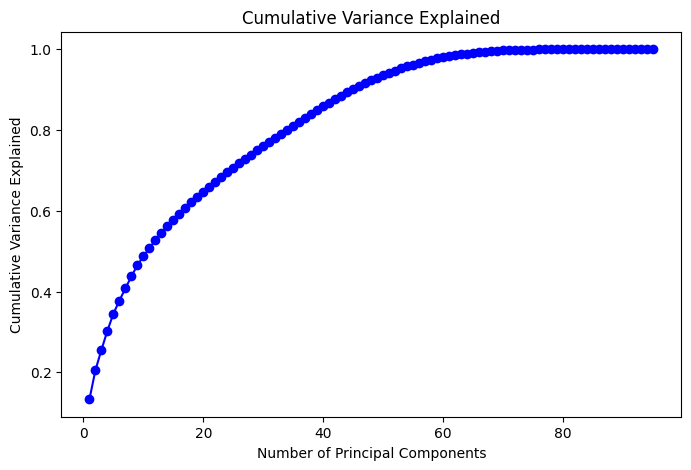

In [ ]:
# let us plot a graph to better understand the relation

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()


From the graph it is clear that 60 features contributes to 98% variance. Let us set the explained variance as 95% which should consist of 53/54 columns

In [ ]:
x_final = PCA(n_components=0.95).fit_transform(x_scaled)

In [ ]:
x_final.shape

(6819, 53)

Finally our features are reduced to 53 columns to cover 95% explained variance

Lets convert this to a dataframe to continue with the modelling part

In [ ]:
x_final = pd.DataFrame(x_final)
x_final.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-7.338294,0.373294,-0.309014,-1.021642,0.162798,1.448300,-0.710591,1.195317,-0.535536,1.665768,...,-0.278090,-1.422372,0.133479,0.370714,-0.282967,0.135463,-0.221174,0.577577,0.502123,0.230586
1,-2.703713,-0.986346,-2.155617,-2.473644,0.835692,0.607047,-0.324440,1.361657,-0.409246,0.693192,...,-0.623835,-0.363155,-0.384024,0.122406,-0.111454,-0.595629,-0.050011,0.607658,0.424996,-0.193823
2,-4.307059,-0.404700,-0.309801,-0.729865,0.335723,-0.198898,0.016022,0.562789,-0.501530,1.793298,...,-0.016626,1.207517,-0.569890,-0.760307,-0.656566,-0.909740,-0.012408,0.413185,-0.237421,-0.556358
3,-5.830736,-1.385669,-1.301105,-2.160071,0.731532,1.043664,0.558476,-0.195704,0.705732,0.024977,...,-0.117902,0.889782,-1.496339,-0.897857,0.812130,0.119660,0.710595,-0.027305,-0.871738,-0.945319
4,-2.343197,-0.201748,0.806267,-0.894912,0.203652,0.266931,0.349238,-0.201997,0.604713,-1.176532,...,-0.162118,-0.164758,1.292016,-0.025935,-0.554815,0.308314,-0.436490,-0.409775,-0.235194,0.057796


In [ ]:
# lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=31)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 53)
(1364, 53)
(5455,)
(1364,)


Trying Logistic Regression on the train/test data obtained using PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(lr1.score(x_train, y_train))
print(lr1.score(x_test, y_test))

0.9725022914757103
0.9596774193548387


In [ ]:
# lets plot the confusion matrix
y_pred = lr1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1301   15]
 [  40    8]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(fp)

15


In [ ]:
# lets plot the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1316
           1       0.35      0.17      0.23        48

    accuracy                           0.96      1364
   macro avg       0.66      0.58      0.60      1364
weighted avg       0.95      0.96      0.95      1364



Important inferences from logistic regression model >

1. Train Accuracy is 97% while Test Accuracy is 96% (little overfitting)

2. From the Confusion Matrix we can see 15 False Posiive cases which means in 15 cases the prediction was not bankrupcy but in reality it was bankrupcy. If we think bankrupcy as a critical problem to avoid, we need to reduce the False Positive cases


In [ ]:
from sklearn.ensemble import  RandomForestClassifier

Now lets check with Random Forest and find out if this model performs better to resolve the problem

In [ ]:
# First check the max_depth optimal value

c_parameter_values = [5,8,10]
df_compare_accuracy = pd.DataFrame(columns=['max_depth', 'train_accuracy','test_accuracy'])

for c in c_parameter_values:
    model = RandomForestClassifier(max_depth=c, random_state = 17)
    y_pred_train = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score_test = accuracy_score(y_test,y_pred)*100
    acc_score_train = accuracy_score(y_train,model.predict(x_train))*100
    df_compare_accuracy.loc[len(df_compare_accuracy)] = [c, acc_score_train, acc_score_test]


In [ ]:
df_compare_accuracy


,max_depth,train_accuracy,test_accuracy
0,5.0,97.140238,96.480938
1,8.0,97.763520,96.554252
2,10.0,98.515124,96.407625


max_depth optimal value comes around 8

We are going to use GridSearch to hypertune the model and check the performance

In [ ]:
# now we will use gridsearch to hypertune the model and check its mterics

from sklearn.model_selection import  GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [10, 15, 35, 75],
    'max_depth': [7,8],
    'min_samples_split': [2, 3, 6]
}

In [ ]:
grid1 = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=4,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid1.fit(x_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8], 'min_samples_split': [2, 3, 6],
                         'n_estimators': [10, 15, 35, 75]},
             scoring='accuracy', verbose=1)

In [ ]:
grid1.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=75)

In [ ]:
rf_final = RandomForestClassifier(max_depth=8, n_estimators=75)
rf_final.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=75)

In [ ]:
print(rf_final.score(x_train, y_train))
print(rf_final.score(x_test, y_test))

0.9794683776351971
0.966275659824047


In [ ]:
print(classification_report(y_test, rf_final.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1316
           1       0.75      0.06      0.12        48

    accuracy                           0.97      1364
   macro avg       0.86      0.53      0.55      1364
weighted avg       0.96      0.97      0.95      1364



In [ ]:
confusion_matrix(y_test, rf_final.predict(x_test))

array([[1315,    1],
       [  45,    3]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_final.predict(x_test)).ravel()
print(fp)

1


Conclusions from the Final Grid Search analysis >

1. We hypertuned the RandomForest model with Grid Search which gave an accuracy of 96.6% improved from 95.9% in Logistic Regression model

2. One more important achievement - We have reduced the number of False Positive cases to only 1 from 16. Considering bankruptcy as a critical event to avoid the model performs quite well on the given dataset